In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('HR_comma_sep.csv')
df.head(5)  

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [4]:
df = df.rename(columns={'satisfaction_level': 'satisfaction_level', 
                        'last_evaluation': 'last_evaluation',
                        'number_project': 'number_project',
                        'average_montly_hours': 'average_montly_hours',
                        'time_spend_company': 'time_spend_company',
                        'Work_accident': 'Work_accident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'left'
                        })

In [5]:
df1 = pd.Series(df['department']).unique()
df2 = pd.Series(df['salary']).unique()
df1,df2

(array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], dtype=object),
 array(['low', 'medium', 'high'], dtype=object))

In [6]:
df['department'].replace(list(pd.Series(df['department']).unique()),np.arange(10),inplace=True)
df['salary'].replace(list(pd.Series(df['salary']).unique()),[0,1,2],inplace=True)

In [7]:
front = df['left']
df.drop(labels='left',axis=1,inplace=True)
df.insert(0,'left',front)
df.head(5)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,0,0
1,1,0.80,0.86,5,262,6,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0


In [8]:
df.shape
df.dtypes

left                      int64
satisfaction_level      float64
last_evaluation         float64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
promotion                 int64
department                int64
salary                    int64
dtype: object

In [9]:
left_rate = df.left.value_counts()/14999
left_rate

0    0.761917
1    0.238083
Name: left, dtype: float64

In [10]:
left_summary = df.groupby('left')
left_summary.mean()
format = lambda x: '%.2f'%x
df.describe().applymap(format)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,department,salary
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.24,0.61,0.72,3.80,201.05,3.50,0.14,0.02,3.34,0.59
std,0.43,0.25,0.17,1.23,49.94,1.46,0.35,0.14,2.82,0.64
min,0.00,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00,0.00
25%,0.00,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00,0.00
50%,0.00,0.64,0.72,4.00,200.00,3.00,0.00,0.00,3.00,1.00
75%,0.00,0.82,0.87,5.00,245.00,4.00,0.00,0.00,6.00,1.00
max,1.00,1.00,1.00,7.00,310.00,10.00,1.00,1.00,9.00,2.00


In [11]:
corr = df.corr()

Text(0.5, 1, 'Heatmap of Correlation Matrix')

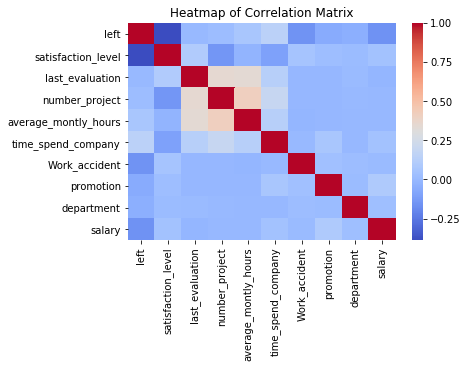

In [12]:
ax = sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap="coolwarm");
ax.set_title('Heatmap of Correlation Matrix')

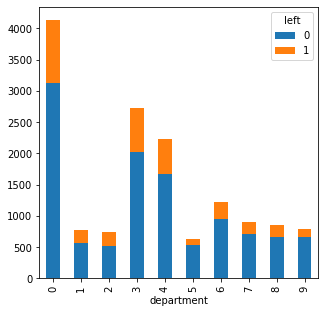

In [13]:
##department vs left
depart_left_table = pd.crosstab(index=df['department'],columns=df['left'])
depart_left_table.plot(kind='bar',figsize=(5,5),stacked=True)

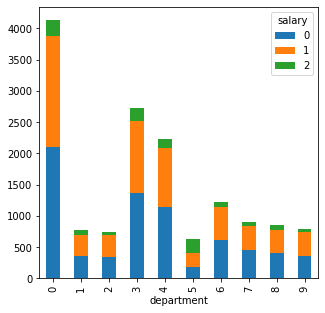

In [14]:
##department vs salary
depart_salary_table = pd.crosstab(index=df['department'],columns=df['salary'])
depart_salary_table.plot(kind='bar',figsize=(5,5),stacked=True)

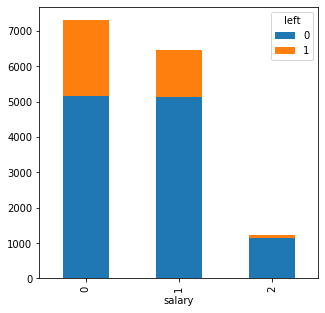

In [16]:
##salary vs left
salary_left_table = pd.crosstab(index=df['salary'],columns=df['left'])
salary_left_table.plot(kind='bar',figsize=(5,5),stacked=True)

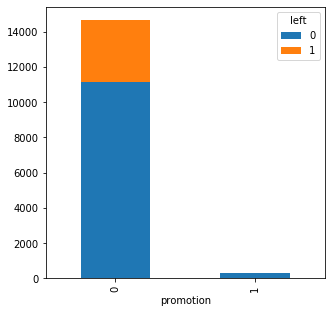

In [17]:
##promotion vs left
promotion_left_table = pd.crosstab(index=df['promotion'],columns=df['left'])
promotion_left_table.plot(kind='bar',figsize=(5,5),stacked=True)

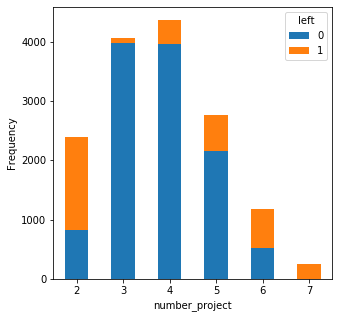

In [19]:
##number_project vs left
project_left_table = pd.crosstab(index=df['number_project'],columns=df['left'])
project_left_table.plot(kind='bar',figsize=(5,5),stacked=True)
df.loc[(df['left']==1),'number_project'].plot(kind='hist',density=1,bins=15,stacked=False,alpha=1)

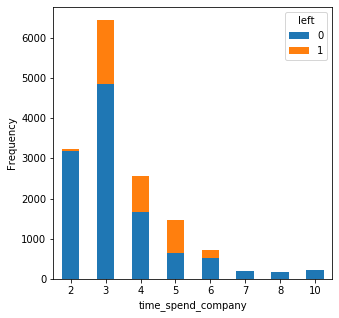

In [20]:
##time_spend_company vs left
project_left_table = pd.crosstab(index=df['time_spend_company'],columns=df['left'])
project_left_table.plot(kind='bar',figsize=(5,5),stacked=True)
df.loc[(df['left']==1),'time_spend_company'].plot(kind='hist',density=1,bins=10,stacked=False,alpha=1)

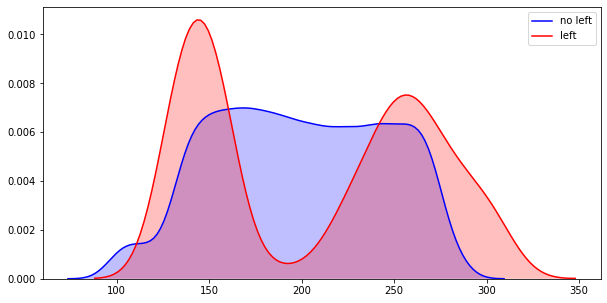

In [23]:
##averge_montly_hours vs left
hours_left_table = pd.crosstab(index=df['average_montly_hours'],columns=df['left'])
fig = plt.figure(figsize=(10,5))
left = sns.kdeplot(df.loc[(df['left']==0),'average_montly_hours'],color='b',shade=True,label='no left')
left = sns.kdeplot(df.loc[(df['left']==1),'average_montly_hours'],color='r',shade=True,label='left')

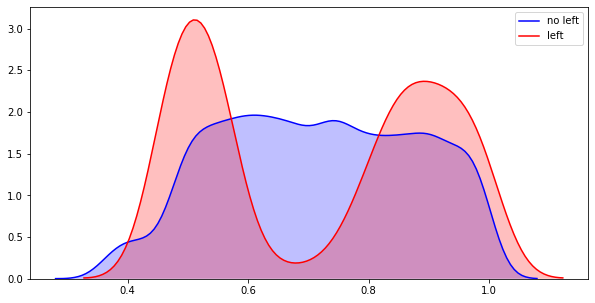

In [24]:
##last_evaluation vs left
evaluation_left_table = pd.crosstab(index=df['last_evaluation'],columns=df['left'])
fig = plt.figure(figsize=(10,5))
left = sns.kdeplot(df.loc[(df['left']==0),'last_evaluation'],color='b',shade=True,label='no left')
left = sns.kdeplot(df.loc[(df['left']==1),'last_evaluation'],color='r',shade=True,label='left')

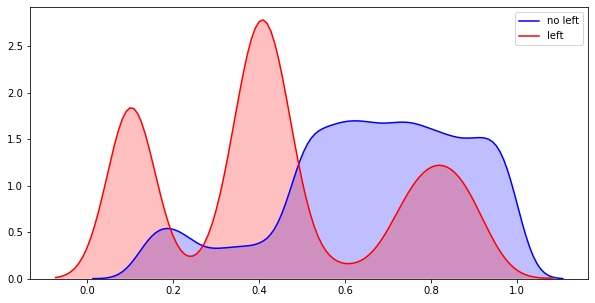

In [25]:
##satisfaction_level vs left
satis_left_table = pd.crosstab(index=df['satisfaction_level'],columns=df['left'])
fig = plt.figure(figsize=(10,5))
left = sns.kdeplot(df.loc[(df['left']==0),'satisfaction_level'],color='b',shade=True,label='no left')
left = sns.kdeplot(df.loc[(df['left']==1),'satisfaction_level'],color='r',shade=True,label='left')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


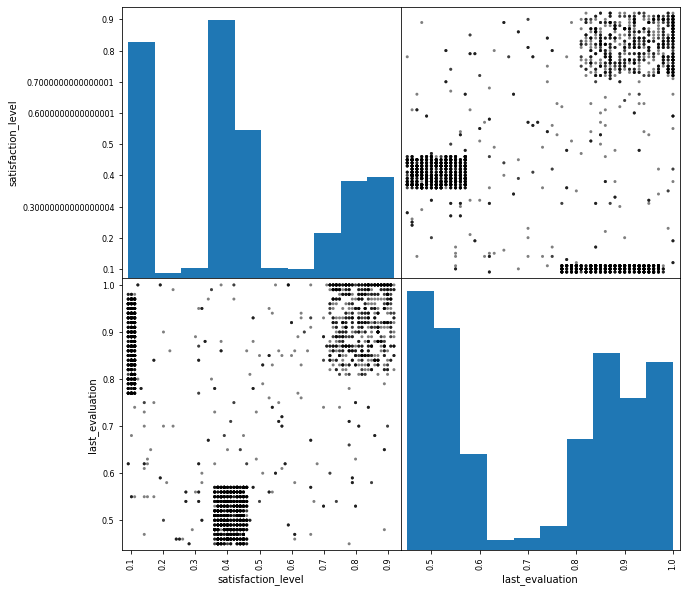

In [29]:
##last_evaluation vs satisfaction_level
df1 = df[df['left']==1]
fig, ax = plt.subplots(figsize=(10,10))
pd.plotting.scatter_matrix(df1[['satisfaction_level','last_evaluation']],color='k',ax=ax)
plt.savefig('scatter.png',dpi=1000,bbox_inches='tight')